# paper metadata and author information

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# author information

paper_author = defaultdict(list)
author_paper = defaultdict(list)

authorFile = open("/home/buyi/Desktop/wos/wos_author.txt", "r") 
authorFile.readline()
for line in authorFile:
    line = line.strip().split("======")
    paper_author[int(line[0])].append(line[2])
    author_paper[line[2]].append(int(line[0]))

In [3]:
# publication year information

paper_year = {}
yearFile = open("/home/buyi/Desktop/wos/wos_year.txt", "r") 
yearFile.readline()
for line in yearFile:
    line = line.strip().split("======")
    paper_year[int(line[0])] = int(line[1])

In [4]:
# publication index information

paper_index = {}
index_paper = {}
paperFile = open("/home/buyi/Desktop/wos/wos_paper.txt", "r") 
paperFile.readline()
for line in paperFile:
    line = line.strip().split("======")
    paper_index[line[0]] = int(line[1])
    index_paper[int(line[1])] = line[0]

In [5]:
def self_citation_whether (paper_1, paper_2):
    for author_1 in paper_author[paper_1]:
        for author_2 in paper_author[paper_2]:
            if author_1 == author_2:
                return True
    return False

# direct citations

In [6]:
# direct citations

paper_citing = defaultdict(list)

citingFile = open("/home/buyi/Desktop/wos/wos_citing.txt", "r")
citingFile.readline()
for line in citingFile:
    line = line.strip().split("======")
    paper_citing[int(line[1])].append(int(line[0]))

In [8]:
# cc distribution
temp_list = []
temp_list_1 = []
temp_list_2 = []
for paper in paper_year.keys():
    temp_list.append(len(paper_citing[paper]))

for cc in range(1, 10001):
    if cc % 1000 == 0:
        print (str(cc) + " out of 10000 citations have been processed...")
    count = 0
    for item in temp_list:
        if item >= cc:
            count += 1
    temp_list_1.append(count)
    temp_list_2.append(cc)
    

1000 out of 10000 citations have been processed...
2000 out of 10000 citations have been processed...
3000 out of 10000 citations have been processed...
4000 out of 10000 citations have been processed...
5000 out of 10000 citations have been processed...
6000 out of 10000 citations have been processed...
7000 out of 10000 citations have been processed...
8000 out of 10000 citations have been processed...
9000 out of 10000 citations have been processed...
10000 out of 10000 citations have been processed...


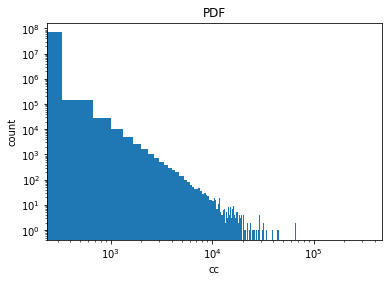

In [9]:
#PDF
plt.hist(temp_list, bins = 1000)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("cc")
plt.ylabel("count")
plt.title("PDF")
plt.show()

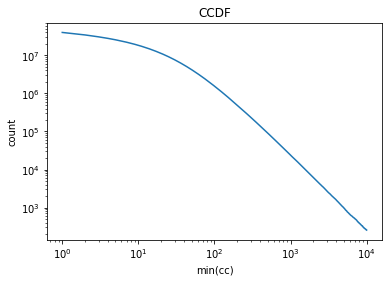

In [10]:
# CCDF
plt.plot(temp_list_2, temp_list_1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("min(cc)")
plt.ylabel("count")
plt.title("CCDF")
plt.show()

In [11]:
# direct self-citation proportion AND citation count

direct_self_list = []
cc_list = []

for paper in paper_year.keys():
    direct_self = 0
    for citing_paper in paper_citing[paper]:
        if self_citation_whether(paper, citing_paper):
            direct_self += 1
    if len(paper_citing[paper]) > 0:
        direct_self = float(direct_self) / float(len(paper_citing[paper]))
        direct_self_list.append(direct_self)
        cc_list.append(len(paper_citing[paper]))

In [12]:
# plot: cc and direct_self_citation (avg, PDF, CCDF)

x1_list = []
y1_list = []
x2_list = []
y2_list = []
for cc in range(0, 10001):
    if cc % 1000 == 0:
        print (str(cc) + " out of 10000 citations have been processed...")
    temp_1 = 0
    count_1 = 0
    panduan_1 = 0
    temp_2 = 0
    count_2 = 0
    panduan_2 = 0
    for i in range(len(cc_list)):
        if cc_list[i] == cc:
            temp_1 += direct_self_list[i]
            count_1 += 1
            panduan_1 = 1
        if cc_list[i] >= cc:
            temp_2 += direct_self_list[i]
            count_2 += 1
            panduan_2 = 1
    if panduan_1 == 1:
        x1_list.append(cc)
        y1_list.append(float(temp_1) / float(count_1))
    if panduan_2 == 1:
        x2_list.append(cc)
        y2_list.append(float(temp_2) / float(count_2))

0 out of 10000 citations have been processed...
1000 out of 10000 citations have been processed...
2000 out of 10000 citations have been processed...
3000 out of 10000 citations have been processed...
4000 out of 10000 citations have been processed...
5000 out of 10000 citations have been processed...
6000 out of 10000 citations have been processed...
7000 out of 10000 citations have been processed...
8000 out of 10000 citations have been processed...
9000 out of 10000 citations have been processed...
10000 out of 10000 citations have been processed...


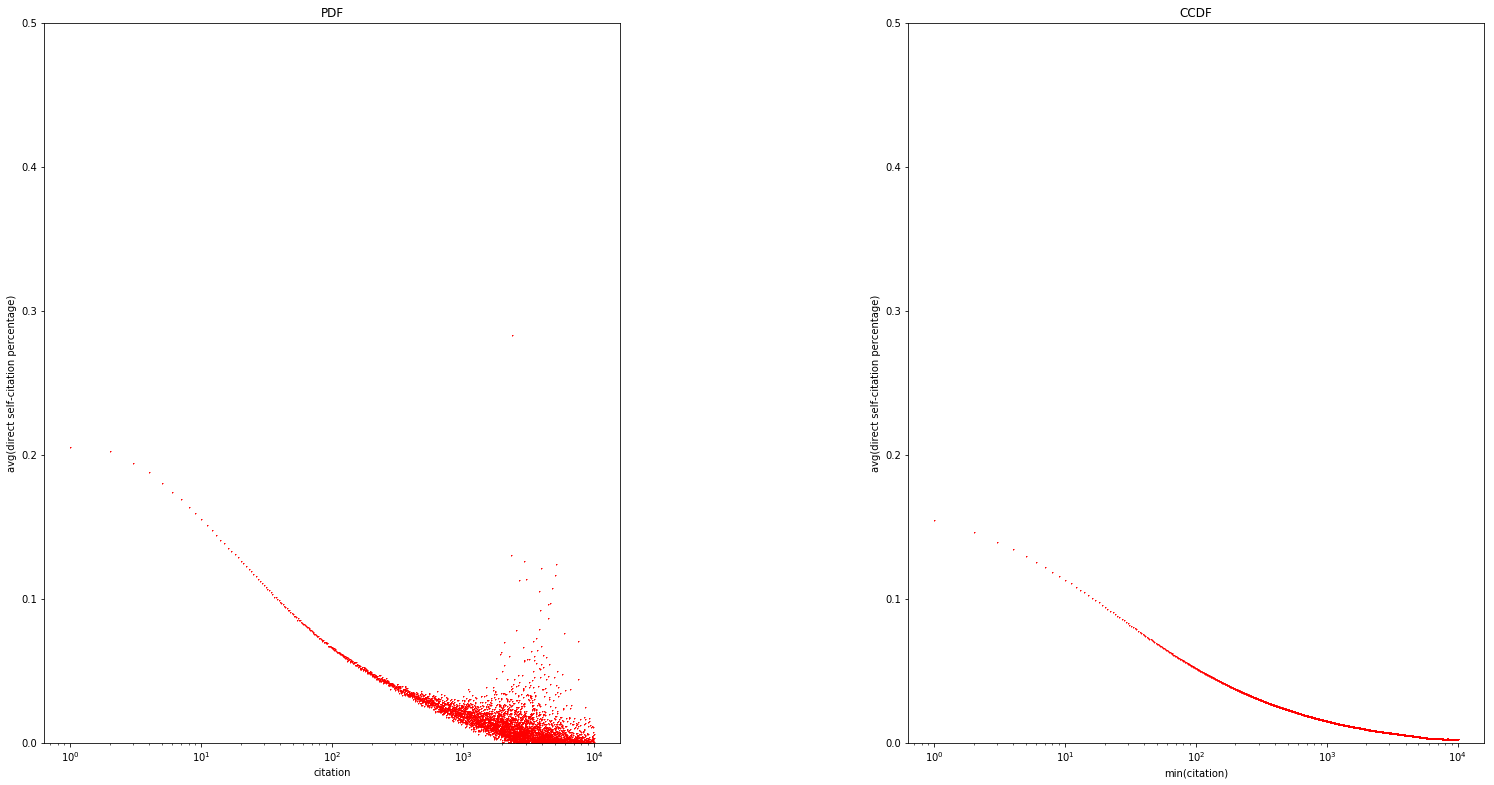

In [13]:
plt.figure(figsize=(10,5))

matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.subplot(1,2,1)
plt.plot(x1_list, y1_list, "r+", markersize = 1)
plt.title('PDF')
plt.xlabel("citation")
plt.ylabel("avg(direct self-citation percentage)")
plt.ylim([0,0.5])
plt.xscale("log")

plt.subplot(1,2,2)
plt.plot(x2_list, y2_list, "r+", markersize = 1)
plt.title('CCDF')
plt.xlabel("min(citation)")
plt.ylabel("avg(direct self-citation percentage)")
plt.ylim([0,0.5])
plt.xscale("log")

plt.subplots_adjust (left = 2, right = 4, top = 4, bottom = 2, wspace = 0.5, hspace = 0.5)
plt.show()

# indirect citations

In [7]:
# indirect citations
count = 0
total = len(paper_year.keys())
indirect_citation = defaultdict(list)
for paper in paper_year.keys():
    count += 1
    if count % 1000000 == 0:
        print "Processed " + str(float(count) / float(total)) + " papers...\n"
    for citing_paper_1 in paper_citing[paper]:
        for citing_paper_2 in paper_citing[paper]:
            if citing_paper_1 in paper_citing[citing_paper_2]:
                temp = []
                temp.append(citing_paper_1)
                temp.append(citing_paper_2)
                indirect_citation[paper].append(temp)

Processed 0.0144245699354 papers...

Processed 0.0288491398708 papers...

Processed 0.0432737098062 papers...

Processed 0.0576982797417 papers...

Processed 0.0721228496771 papers...

Processed 0.0865474196125 papers...

Processed 0.100971989548 papers...

Processed 0.115396559483 papers...

Processed 0.129821129419 papers...

Processed 0.144245699354 papers...

Processed 0.15867026929 papers...

Processed 0.173094839225 papers...

Processed 0.18751940916 papers...

Processed 0.201943979096 papers...

Processed 0.216368549031 papers...

Processed 0.230793118967 papers...

Processed 0.245217688902 papers...

Processed 0.259642258837 papers...

Processed 0.274066828773 papers...

Processed 0.288491398708 papers...

Processed 0.302915968644 papers...

Processed 0.317340538579 papers...

Processed 0.331765108515 papers...

Processed 0.34618967845 papers...

Processed 0.360614248385 papers...

Processed 0.375038818321 papers...

Processed 0.389463388256 papers...

Processed 0.403887958192 

In [8]:
# indirect self-citation proportion AND citation count

indirect_self_list = []
cc_list_0 = []

for paper in paper_year.keys():
    indirect_self = 0
    for temp in indirect_citation[paper]:
        if self_citation_whether(temp[0], temp[1]):
            indirect_self += 1
    if len(indirect_citation[paper]) > 0:
        indirect_self = float(indirect_self) / float(len(indirect_citation[paper]))
        indirect_self_list.append(indirect_self)
        cc_list_0.append(len(paper_citing[paper]))

In [9]:
# plot: cc and indirect_self_citation (avg, PDF, CCDF)

x5_list = []
y5_list = []
x6_list = []
y6_list = []
for cc in range(0, 10001):
    if cc % 1000 == 0:
        print (str(cc) + " out of 10000 citations have been processed...")
    temp_5 = 0
    count_5 = 0
    panduan_5 = 0
    temp_6 = 0
    count_6 = 0
    panduan_6 = 0
    for i in range(len(cc_list_0)):
        if cc_list_0[i] == cc:
            temp_5 += indirect_self_list[i]
            count_5 += 1
            panduan_5 = 1
        if cc_list_0[i] >= cc:
            temp_6 += indirect_self_list[i]
            count_6 += 1
            panduan_6 = 1
    if panduan_5 == 1:
        x5_list.append(cc)
        y5_list.append(float(temp_5) / float(count_5))
    if panduan_6 == 1:
        x6_list.append(cc)
        y6_list.append(float(temp_6) / float(count_6))

0 out of 10000 citations have been processed...
1000 out of 10000 citations have been processed...
2000 out of 10000 citations have been processed...
3000 out of 10000 citations have been processed...
4000 out of 10000 citations have been processed...
5000 out of 10000 citations have been processed...
6000 out of 10000 citations have been processed...
7000 out of 10000 citations have been processed...
8000 out of 10000 citations have been processed...
9000 out of 10000 citations have been processed...
10000 out of 10000 citations have been processed...


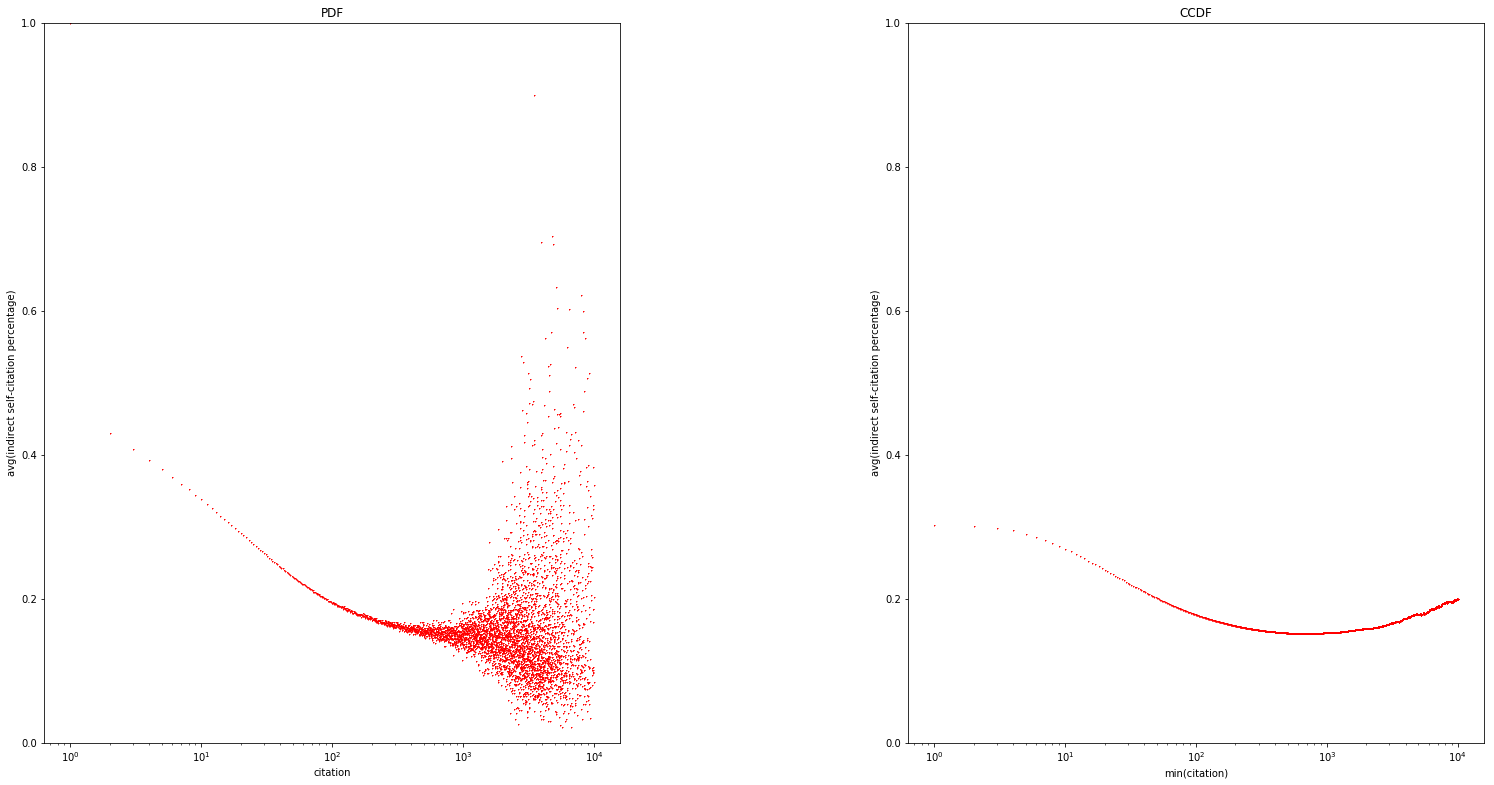

In [10]:
plt.figure(figsize=(10,5))
matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.subplot(1,2,1)
plt.plot(x5_list, y5_list, "r+", markersize = 1)
plt.title('PDF')
plt.xlabel("citation")
plt.ylabel("avg(indirect self-citation percentage)")
plt.ylim([0,1])
plt.xscale("log")

plt.subplot(1,2,2)
plt.plot(x6_list, y6_list, "r+", markersize = 1)
plt.title('CCDF')
plt.xlabel("min(citation)")
plt.ylabel("avg(indirect self-citation percentage)")
plt.ylim([0,1])
plt.xscale("log")

plt.subplots_adjust (left = 2, right = 4, top = 4, bottom = 2, wspace = 0.5, hspace = 0.5)
plt.show()

In [11]:
# Four types of indirect citations

type_1_list = []
type_2_list = []
type_3_list = []
type_4_list = []
cc_2_list = []

x7_list = []
x8_list = []
x9_list = []
x10_list = []

y7_list = []
y8_list = []
y9_list = []
y10_list = []

x11_list = []
x12_list = []
x13_list = []
x14_list = []

y11_list = []
y12_list = []
y13_list = []
y14_list = []

for paper in paper_year.keys():
    type_1 = 0
    type_2 = 0
    type_3 = 0
    type_4 = 0
    if len(indirect_citation[paper]) > 0:
        for item in indirect_citation[paper]:
            if self_citation_whether(paper, item[1]) and self_citation_whether(item[0], item[1]) and self_citation_whether(paper, item[0]) == False:
                type_1 += 1
            elif self_citation_whether(paper, item[1]) and self_citation_whether(item[0], item[1]) and self_citation_whether(paper, item[0]):
                type_2 += 1
            elif self_citation_whether(paper, item[1]) == False and self_citation_whether(item[0], item[1]) and self_citation_whether(paper, item[0]):
                type_3 += 1
            elif self_citation_whether(paper, item[1]) == False and self_citation_whether(item[0], item[1]) and self_citation_whether(paper, item[0]) == False:
                type_4 += 1
        type_1 = float(type_1) / float(len(indirect_citation[paper]))
        type_2 = float(type_2) / float(len(indirect_citation[paper]))
        type_3 = float(type_3) / float(len(indirect_citation[paper]))
        type_4 = float(type_4) / float(len(indirect_citation[paper]))
        type_1_list.append(type_1)
        type_2_list.append(type_2)
        type_3_list.append(type_3)
        type_4_list.append(type_4)
        cc_2_list.append(len(paper_citing[paper]))

for cc in range(0, 10001):
    if cc % 1000 == 0:
        print (str(cc) + " out of 10000 citations have been processed...")
    temp_7 = 0
    count_7 = 0
    panduan_7 = 0
    temp_8 = 0
    count_8 = 0
    panduan_8 = 0
    temp_9 = 0
    count_9 = 0
    panduan_9 = 0
    temp_10 = 0
    count_10 = 0
    panduan_10 = 0
    temp_11 = 0
    count_11 = 0
    panduan_11 = 0
    temp_12 = 0
    count_12 = 0
    panduan_12 = 0
    temp_13 = 0
    count_13 = 0
    panduan_13 = 0
    temp_14 = 0
    count_14 = 0
    panduan_14 = 0
    for i in range(len(cc_2_list)):
        if cc_2_list[i] == cc:
            temp_11 += type_1_list[i]
            count_11 += 1
            panduan_11 = 1
            temp_12 += type_2_list[i]
            count_12 += 1
            panduan_12 = 1
            temp_13 += type_3_list[i]
            count_13 += 1
            panduan_13 = 1
            temp_14 += type_4_list[i]
            count_14 += 1
            panduan_14 = 1
        if cc_2_list[i] >= cc:
            temp_7 += type_1_list[i]
            count_7 += 1
            panduan_7 = 1
            temp_8 += type_2_list[i]
            count_8 += 1
            panduan_8 = 1
            temp_9 += type_3_list[i]
            count_9 += 1
            panduan_9 = 1
            temp_10 += type_4_list[i]
            count_10 += 1
            panduan_10 = 1
    if panduan_7 == 1:
        x7_list.append(cc)
        y7_list.append(float(temp_7) / float(count_7))
    if panduan_8 == 1:
        x8_list.append(cc)
        y8_list.append(float(temp_8) / float(count_8))
    if panduan_9 == 1:
        x9_list.append(cc)
        y9_list.append(float(temp_9) / float(count_9))
    if panduan_10 == 1:
        x10_list.append(cc)
        y10_list.append(float(temp_10) / float(count_10))
    if panduan_11 == 1:
        x11_list.append(cc)
        y11_list.append(float(temp_11) / float(count_11))
    if panduan_12 == 1:
        x12_list.append(cc)
        y12_list.append(float(temp_12) / float(count_12))
    if panduan_13 == 1:
        x13_list.append(cc)
        y13_list.append(float(temp_13) / float(count_13))
    if panduan_14 == 1:
        x14_list.append(cc)
        y14_list.append(float(temp_14) / float(count_14))

0 out of 10000 citations have been processed...
1000 out of 10000 citations have been processed...
2000 out of 10000 citations have been processed...
3000 out of 10000 citations have been processed...
4000 out of 10000 citations have been processed...
5000 out of 10000 citations have been processed...
6000 out of 10000 citations have been processed...
7000 out of 10000 citations have been processed...
8000 out of 10000 citations have been processed...
9000 out of 10000 citations have been processed...
10000 out of 10000 citations have been processed...


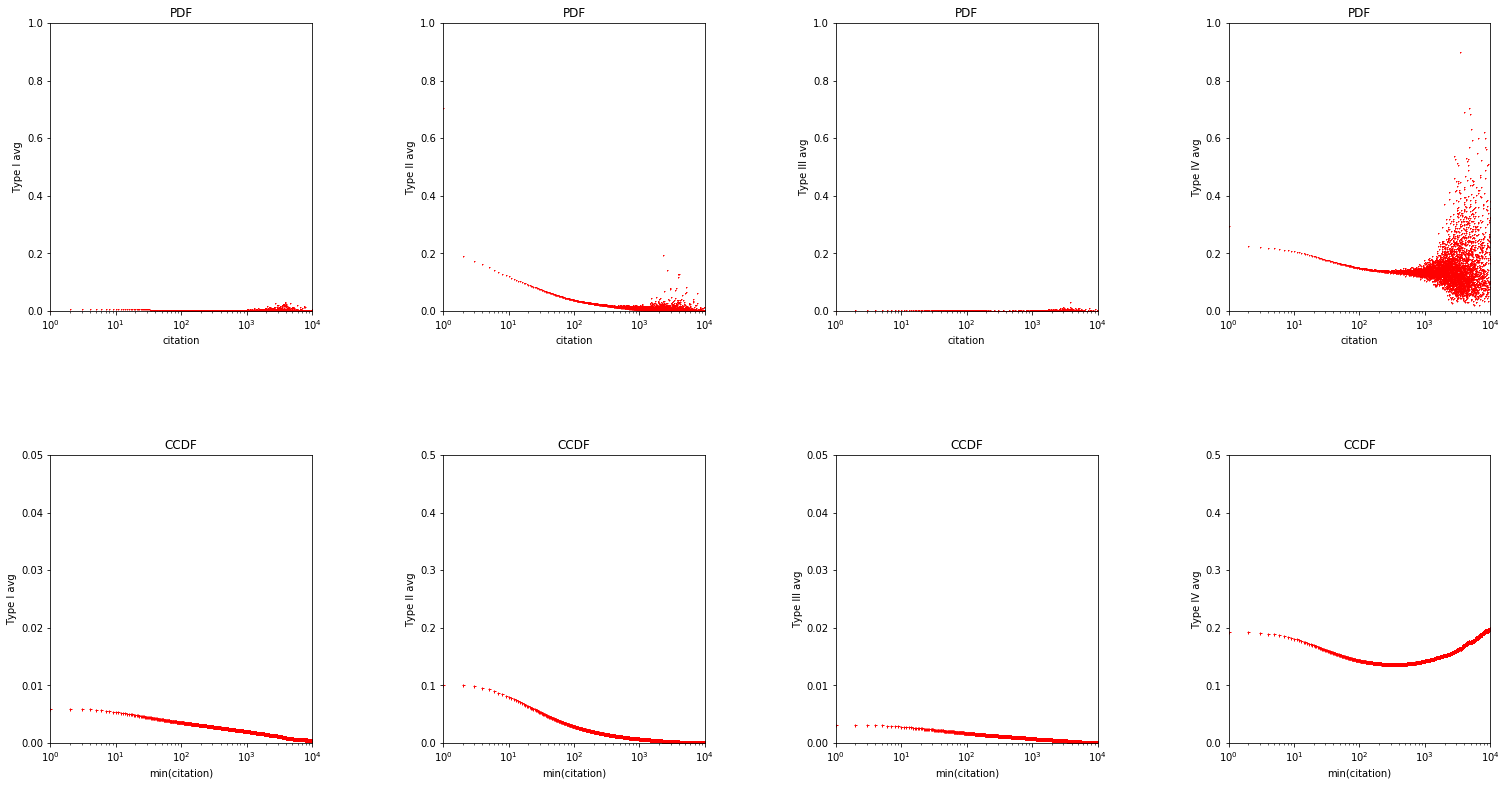

In [12]:
matplotlib.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize=(10,5))

plt.subplot(2,4,1)
plt.plot(x11_list, y11_list, "r+", markersize = 1)
plt.title('PDF')
plt.xlabel("citation")
plt.ylabel("Type I avg")
plt.xlim([1,10000])
plt.ylim([0,1])
plt.xscale("log")

plt.subplot(2,4,2)
plt.plot(x12_list, y12_list, "r+", markersize = 1)
plt.title('PDF')
plt.xlabel("citation")
plt.xlim([1,10000])
plt.ylabel("Type II avg")
plt.ylim([0,1])
plt.xscale("log")

plt.subplot(2,4,3)
plt.plot(x13_list, y13_list, "r+", markersize = 1)
plt.title('PDF')
plt.xlabel("citation")
plt.ylabel("Type III avg")
plt.xlim([1,10000])
plt.ylim([0,1])
plt.xscale("log")

plt.subplot(2,4,4)
plt.plot(x14_list, y14_list, "r+", markersize = 1)
plt.title('PDF')
plt.xlabel("citation")
plt.ylabel("Type IV avg")
plt.xlim([1,10000])
plt.ylim([0,1])
plt.xscale("log")

plt.subplot(2,4,5)
plt.plot(x7_list, y7_list, "r+", markersize = 3)
plt.title('CCDF')
plt.xlabel("min(citation)")
plt.ylabel("Type I avg")
plt.xlim([1,10000])
plt.ylim([0,0.05])
plt.xscale("log")

plt.subplot(2,4,6)
plt.plot(x8_list, y8_list, "r+", markersize = 3)
plt.title('CCDF')
plt.xlabel("min(citation)")
plt.ylabel("Type II avg")
plt.xlim([1,10000])
plt.ylim([0,0.5])
plt.xscale("log")

plt.subplot(2,4,7)
plt.plot(x9_list, y9_list, "r+", markersize = 3)
plt.title('CCDF')
plt.xlabel("min(citation)")
plt.ylabel("Type III avg")
plt.xlim([1,10000])
plt.ylim([0,0.05])
plt.xscale("log")

plt.subplot(2,4,8)
plt.plot(x10_list, y10_list, "r+", markersize = 3)
plt.title('CCDF')
plt.xlabel("min(citation)")
plt.ylabel("Type IV avg")
plt.xlim([1,10000])
plt.ylim([0,0.5])
plt.xscale("log")

plt.subplots_adjust (left = 2, right = 4, top = 4, bottom = 2, wspace = 0.5, hspace = 0.5)
plt.show()

# Direct self-citation details (where do direct self-citations come from)

In [ ]:
# Three types of direct self-citations

conSelf_list = []
leSelf_list = []
ieSelf_list = []
cc_list_1 = []

for paper in paper_year.keys():
    
    conSelf = 0
    ieSelf = 0
    leSelf = 0

    
    for citing_paper in paper_citing[paper]:
        type = 0 # 1: connector, 2: late endorser, 3: isolate endorser
        for temp in indirect_citation[paper]:
            if citing_paper == temp[1]:
                type = 1
        if type == 0:
            for temp in indirect_citation[paper]:
                if citing_paper == temp[0]:
                    type = 2
        if type == 0:
            type = 3
        
        # Now we have known the type of this citing paper
        if self_citation_whether(paper, citing_paper):
            if type == 1:
                conSelf += 1
            elif type == 2:
                leSelf += 1
            else:
                ieSelf += 1
    conSelf_list.append(conSelf)
    leSelf_list.append(leSelf)
    ieSelf_list.append(ieSelf)
    cc_list_1.append(len(paper_citing[paper]))
        
        

In [ ]:
# plot: cc and three types of direct_self_citation (avg, PDF, CCDF)

x3_list = []
y3_list = []
x4_list = []
y4_list = []
for cc in range(0, 10001):
    if cc % 1000 == 0:
        print (str(cc) + " out of 10000 citations have been processed...")
    temp_3 = 0
    count_3 = 0
    panduan_3 = 0
    temp_4 = 0
    count_4 = 0
    panduan_4 = 0
    for i in range(len(cc_list)):
        if cc_list[i] == cc:
            temp_3 += direct_self_list[i]
            count_3 += 1
            panduan_3 = 1
        if cc_list[i] >= cc:
            temp_4 += direct_self_list[i]
            count_4 += 1
            panduan_4 = 1
    if panduan_3 == 1:
        x3_list.append(cc)
        y3_list.append(float(temp_3) / float(count_3))
    if panduan_4 == 1:
        x4_list.append(cc)
        y4_list.append(float(temp_4) / float(count_4))

In [ ]:
matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(x3_list, y3_list, "r+", markersize = 3)
plt.title('PDF')
plt.xlabel("citation")
plt.ylabel("avg(direct self-citation percentage)")
#plt.ylim([0,1])
plt.xscale("log")

plt.subplot(1,2,2)
plt.plot(x4_list, y4_list, "r+", markersize = 3)
plt.title('CCDF')
plt.xlabel("min(citation)")
plt.ylabel("avg(direct self-citation percentage)")
#plt.ylim([0,1])
plt.xscale("log")

plt.subplots_adjust (left = 2, right = 4, top = 4, bottom = 2, wspace = 0.5, hspace = 0.5)
plt.show()

# DCCP and Self-citation (have/no DCCPs, have/no self-citations)

In [ ]:
# The first "t" is have dccp, the second "t" is have direct self-citations
dccp_self = [] # 1: tt, 2: tf, 3: ft, 4: ff
cc_list_4 = []

for paper in paper_year.keys():
    zhuangtai = 0
    if len(indirect_citation[paper]) > 0:
        for citing_paper in paper_citing[paper]:
            if self_citation_whether(paper, citing_paper):
                dccp_self.append(1)
                zhuangtai = 1
                break
        if zhuangtai == 0:
            dccp_self.append(2)
    else:
        for citing_paper in paper_citing[paper]:
            if self_citation_whether(paper, citing_paper):
                dccp_self.append(3)
                zhuangtai = 1
                break
        if zhuangtai == 0:
            dccp_self.append(4)
    cc_list_4.append(len(paper_citing[paper]))

dccp_self_tt_dic = {} # key: cc, value: number of tt
dccp_self_tf_dic = {}
dccp_self_ft_dic = {}
dccp_self_ff_dic = {}

for cc in range(0, 10001):
    if cc % 1000 == 0:
        print (str(cc) + " out of 10000 citations have been processed...")
    dccp_self_tt_dic[cc] = 0
    dccp_self_tf_dic[cc] = 0
    dccp_self_ft_dic[cc] = 0
    dccp_self_ff_dic[cc] = 0
    
    for i in range(len(cc_list_4)):
        if cc_list_4[i] >= cc:
            if dccp_self[i] == 1:
                dccp_self_tt_dic[cc] += 1
            elif dccp_self[i] == 2:
                dccp_self_tf_dic[cc] += 1
            elif dccp_self[i] == 3:
                dccp_self_ft_dic[cc] += 1
            elif dccp_self[i] == 4:
                dccp_self_ff_dic[cc] += 1


In [ ]:
a1=[]
b1=[]
c1=[]
d1=[]
a2=[]
b2=[]
c2=[]
a3=[]
b3=[]
c3=[]
a4=[]
b4=[]

a11=[]
a111=[]
a22=[]
a33=[]
    
for item in dccp_self_tt_dic.keys():
    a1.append(item)
    b1.append(dccp_self_tt_dic[item])
for item in dccp_self_tf_dic.keys():
    a2.append(item)
    b2.append(dccp_self_tf_dic[item])
for item in dccp_self_ft_dic.keys():
    a3.append(item)
    b3.append(dccp_self_ft_dic[item])    
for item in dccp_self_ff_dic.keys():
    a4.append(item)
    b4.append(dccp_self_ff_dic[item])

for item in dccp_self_tt_dic.keys():
    if dccp_self_tf_dic[item] != 0:
        a11.append(item)
        c1.append(float(dccp_self_tt_dic[item]) / float(dccp_self_tf_dic[item]))
for item in dccp_self_tt_dic.keys():
    if dccp_self_ft_dic[item] != 0:
        a111.append(item)
        d1.append(float(dccp_self_tt_dic[item]) / float(dccp_self_ft_dic[item]))
for item in dccp_self_tf_dic.keys():
    if dccp_self_ff_dic[item] != 0:
        a22.append(item) 
        c2.append(float(dccp_self_tf_dic[item]) / float(dccp_self_ff_dic[item]))
               
for item in dccp_self_ft_dic.keys():
    if dccp_self_ff_dic[item] != 0:
        a33.append(item)
        c3.append(float(dccp_self_ft_dic[item]) / float(dccp_self_ff_dic[item]))



In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.plot(a1, b1, "r+", markersize = 3, label = "have DCCP and self-citations")
plt.plot(a2, b2, "b+", markersize = 3, label = "have DCCP but no self-citations")
plt.plot(a3, b3, "g+", markersize = 3, label = "no DCCP but have self-citations")
plt.plot(a4, b4, "y+", markersize = 3, label = "no DCCP nor self-citations")
plt.xlabel("min(citation)")
plt.ylabel("DCCP and self-citations")
plt.legend(loc='upper right')
plt.xscale("log")
plt.yscale("log")

plt.subplot(2,2,2)
plt.plot(a11, c1, "r+", markersize = 3, label = "tt/tf")
plt.plot(a111, d1, "g+", markersize = 3, label = "tt/ft")
plt.xlabel("min(citation)")
plt.ylabel("ratio")
plt.legend(loc="upper left")
plt.xscale("log")
plt.yscale("log")

plt.subplot(2,2,3)
plt.plot(a22, c2, "r+", markersize = 3, label = "tf/ff")
plt.xlabel("min(citation)")
plt.ylabel("ratio of tf/ff")
plt.legend(loc="upper left")
plt.xscale("log")
plt.yscale("log")

plt.subplot(2,2,4)
plt.plot(a33, c3, "r+", markersize = 3, label = "ft/ff")
plt.xlabel("min(citation)")
plt.ylabel("ratio of ft/ff")
plt.legend(loc="upper left")
plt.xscale("log")

plt.subplots_adjust (left = 2, right = 4, top = 4, bottom = 2, wspace = 0.5, hspace = 0.5)
plt.show()

In [ ]:
a5=[]
b5=[]
c5=[]
d5=[]
a6=[]
b6=[]
c6=[]
d6=[]
a7=[]
b7=[]
c7=[]
d7=[]
a8=[]
b8=[]
c8=[]
d8=[]
a55=[]
a555=[]
a66=[]
a666=[]
a77=[]
a777=[]
a88=[]
a888=[]
for item in dccp_self_tt_dic.keys():
    if dccp_self_tt_dic[item] + dccp_self_tf_dic[item] != 0:
        a5.append(item)
        b5.append(float(dccp_self_tt_dic[item]) / float(dccp_self_tt_dic[item] + dccp_self_tf_dic[item]))
    if dccp_self_tt_dic[item] + dccp_self_ft_dic[item] != 0:
        a55.append(item)
        c5.append(float(dccp_self_tt_dic[item]) / float(dccp_self_tt_dic[item] + dccp_self_ft_dic[item]))
    if dccp_self_tt_dic[item] + dccp_self_tf_dic[item] + dccp_self_ft_dic[item] + dccp_self_ff_dic[item] != 0:
        a555.append(item)
        d5.append(float(dccp_self_tt_dic[item]) / float(dccp_self_tt_dic[item] + dccp_self_tf_dic[item] + dccp_self_ft_dic[item] + dccp_self_ff_dic[item]))
for item in dccp_self_tf_dic.keys():
    if dccp_self_tf_dic[item] + dccp_self_tt_dic[item] != 0:
        a6.append(item)
        b6.append(float(dccp_self_tf_dic[item]) / float(dccp_self_tf_dic[item] + dccp_self_tt_dic[item]))
    if dccp_self_tf_dic[item] + dccp_self_ff_dic[item] != 0:
        a66.append(item)
        c6.append(float(dccp_self_tf_dic[item]) / float(dccp_self_tf_dic[item] + dccp_self_ff_dic[item]))
    if dccp_self_tt_dic[item] + dccp_self_tf_dic[item] + dccp_self_ft_dic[item] + dccp_self_ff_dic[item] != 0:
        a666.append(item)
        d6.append(float(dccp_self_tf_dic[item]) / float(dccp_self_tt_dic[item] + dccp_self_tf_dic[item] + dccp_self_ft_dic[item] + dccp_self_ff_dic[item]))
for item in dccp_self_ft_dic.keys():
    if dccp_self_ft_dic[item] + dccp_self_ff_dic[item] != 0:
        a7.append(item)
        b7.append(float(dccp_self_ft_dic[item]) / float(dccp_self_ft_dic[item] + dccp_self_ff_dic[item]))
    if dccp_self_tt_dic[item] + dccp_self_ft_dic[item] != 0:
        a77.append(item)
        c7.append(float(dccp_self_ft_dic[item]) / float(dccp_self_tt_dic[item] + dccp_self_ft_dic[item]))
    if dccp_self_tt_dic[item] + dccp_self_tf_dic[item] + dccp_self_ft_dic[item] + dccp_self_ff_dic[item] != 0:
        a777.append(item)
        d7.append(float(dccp_self_ft_dic[item]) / float(dccp_self_tt_dic[item] + dccp_self_tf_dic[item] + dccp_self_ft_dic[item] + dccp_self_ff_dic[item]))
for item in dccp_self_ff_dic.keys():
    if dccp_self_ft_dic[item] + dccp_self_ff_dic[item] != 0:
        a8.append(item)
        b8.append(float(dccp_self_ff_dic[item]) / float(dccp_self_ft_dic[item] + dccp_self_ff_dic[item]))
    if dccp_self_tf_dic[item] + dccp_self_ff_dic[item] != 0:
        a88.append(item)
        c8.append(float(dccp_self_ff_dic[item]) / float(dccp_self_tf_dic[item] + dccp_self_ff_dic[item]))
    if dccp_self_tt_dic[item] + dccp_self_tf_dic[item] + dccp_self_ft_dic[item] + dccp_self_ff_dic[item] != 0:
        a888.append(item)
        d8.append(float(dccp_self_ff_dic[item]) / float(dccp_self_tt_dic[item] + dccp_self_tf_dic[item] + dccp_self_ft_dic[item] + dccp_self_ff_dic[item]))


In [ ]:
# different ratios (CCDF)
plt.figure(figsize=(10,5))

# For tt as nominator
plt.subplot(2,2,1)
plt.plot(a5, b5, "r+", markersize = 3, label = "tt/(tt+tf)")
plt.plot(a55, c5, "g+", markersize = 3, label = "tt/(tt+ft)")
plt.plot(a555, d5, "b+", markersize = 3, label = "tt/all")
plt.xlabel("cc")
plt.ylabel("tt")
plt.legend(loc='upper left')
plt.xscale("log")

# For tf as nominator
plt.subplot(2,2,2)
plt.plot(a6, b6, "r+", markersize = 3, label = "tf/(tt+tf)")
plt.plot(a66, c6, "g+", markersize = 3, label = "tf/(tf+ff)")
plt.plot(a666, d6, "b+", markersize = 3, label = "tf/all")
plt.xlabel("cc")
plt.ylabel("tf")
plt.legend(loc='upper left')
plt.xscale("log")

# For ft as nominator
plt.subplot(2,2,3)
plt.plot(a7, b7, "r+", markersize = 3, label = "ft/(ft+ff)")
plt.plot(a77, c7, "g+", markersize = 3, label = "ft/(tt+ft)")
plt.plot(a777, d7, "b+", markersize = 3, label = "ft/all")
plt.xlabel("cc")
plt.ylabel("ft")
plt.legend(loc='upper left')
plt.xscale("log")

# For ff as nominator
plt.subplot(2,2,4)
plt.plot(a8, b8, "r+", markersize = 3, label = "ff/(ft+tf)")
plt.plot(a88, c8, "g+", markersize = 3, label = "ff/(tf+ff)")
plt.plot(a888, d8, "b+", markersize = 3, label = "ff/all")
plt.xlabel("cc")
plt.ylabel("ff")
plt.legend(loc='upper left')
plt.xscale("log")

plt.subplots_adjust (left = 2, right = 4, top = 4, bottom = 2, wspace = 0.5, hspace = 0.5)
plt.show()

# Self-citations and year

In [ ]:
year_list = [] #from 1980 to 2008
self_year_list = []
non_self_year_list = []
count = 0


for year in range(1980, 2009):
    self_year = 0
    non_self_year = 0
    self_count = 0
    non_self_count = 0
    for paper in paper_year.keys():
        count += 1
        if paper_year[paper] == year:
            if paper in paper_citing.keys():
                for citing_paper in paper_citing[paper]:
                    if paper_year[citing_paper] <= year + 10:
                        if self_citation_whether(paper, citing_paper):
                            self_year += (paper_year[citing_paper] - paper_year[paper])
                            self_count += 1
                        else:
                            non_self_year += (paper_year[citing_paper] - paper_year[paper])
                            non_self_count += 1
    self_year_list.append(float(self_year) / float(self_count + 1))
    non_self_year_list.append(float(non_self_year) / float(non_self_count + 1))
    year_list.append(year)


In [ ]:
#plot

plt.plot(year_list, self_year_list, "r+", markersize = 3, label = 'self_year_avg')
plt.plot(year_list, non_self_year_list, "g+", markersize = 3, label = 'non_self_year_avg')
plt.xlabel('year')
plt.ylabel('self/non_self year average')
plt.legend(loc = 'upper left')
plt.show()